# Problem Statement -  Predict Optimal Pricing for AirBNB

Airbnb Inc is a popular online platform that facilitates lodging arrangements and tourism experiences through homestays. With a customer base of nearly 150 million worldwide, it is crucial to consider pricing as a key factor in attracting and retaining customers and staying ahead of competitors. To address this, we have a dataset of 74,111 Airbnb properties from various countries. Our goal is to develop a simple and multiple linear regression model using this data to predict the optimal pricing for a newly listed property on Airbnb.

In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")  

C:\Users\admin\AppData\Local\Temp\ipykernel_15756\1606136728.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBNB.csv")


### EDA

In [4]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [5]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [6]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [8]:
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


### unique values for categorical variables

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


CANCELLATION_POLICY :  3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


CLEANING_FEE :  2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


INSTANT_BOOKABLE :  2
t    19451
f    54660
Name: instant_bookable, dtype: int64




**The output provided represents the distribution of different variables within the dataset for Airbnb properties.**

*Room Type:*

Shared room: There are 2,163 properties listed as shared rooms.
Private room: There are 30,635 properties listed as private rooms.
Entire home/apt: There are 41,308 properties listed as entire homes or apartments.

*Cancellation Policy:*

Moderate: There are 19,060 properties with a moderate cancellation policy.
Flexible: There are 22,543 properties with a flexible cancellation policy.
Strict: There are 32,500 properties with a strict cancellation policy.

*Cleaning Fee:*

False: There are 19,708 properties without a cleaning fee.
True: There are 54,399 properties with a cleaning fee.

*Instant Bookable:*

True: There are 19,451 properties that can be instantly booked.
False: There are 54,660 properties that require host approval before booking.


**These counts provide an understanding of the distribution of these categorical variables in the dataset, which can be used as features in building a linear regression model to predict the strategic pricing of new Airbnb listings.**

### Converting Instant_bookable from 'f' and 't' to boolean

In [10]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [11]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [12]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.0,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.0,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.0,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,NaN,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.0,0.0,1.0,4.744932,0,0,1,0,1


In [13]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
instant_bookable                    0
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
dtype: int64

**The outpu indicates missing or null values in the dataset for all variables. Here's an explanation of the missing value counts:**

- Accommodates: There are 3 missing values for the number of guests the property can accommodate.

- Bathrooms: There are 203 missing values for the number of bathrooms in the properties.

- Instant Bookable: There are 0 missing values for the instant bookable feature.

- Review Scores Rating: There are 16,722 missing values for the review scores rating of the properties.

- Bedrooms: There are 92 missing values for the number of bedrooms in the properties.

- Beds: There are 131 missing values for the number of beds in the properties.

- Log Price: There are 0 missing values for the logged price variable.

- Room Type (Private room, Shared room): There are 0 missing values for the room type variables.

- Cancellation Policy (Moderate, Strict): There are 0 missing values for the cancellation policy variables.

- Cleaning Fee: There are 0 missing values for the cleaning fee variable.

*These missing values should be handled appropriately before building a regression model. Common approaches include imputing the missing values with appropriate values (e.g., mean, median, or mode) or removing the instances with missing values from the dataset, depending on the specific context and data quality considerations.*

**We will impute the missing values with mean. Using the mean as an imputation strategy can be suitable for numerical variables such as "Accommodates," "Bathrooms," "Bedrooms," and "Beds," it may not be the best choice for categorical variables**

### Imputing missing values

In [14]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

accommodates                    0
bathrooms                       0
instant_bookable                0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
dtype: int64

In [15]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1


In [16]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069,0.413366,0.029186,0.257182,0.438531,0.734021
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394,0.492441,0.168329,0.437083,0.496211,0.441856
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.000000,0.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for duplicates

In [17]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 19998


In [18]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

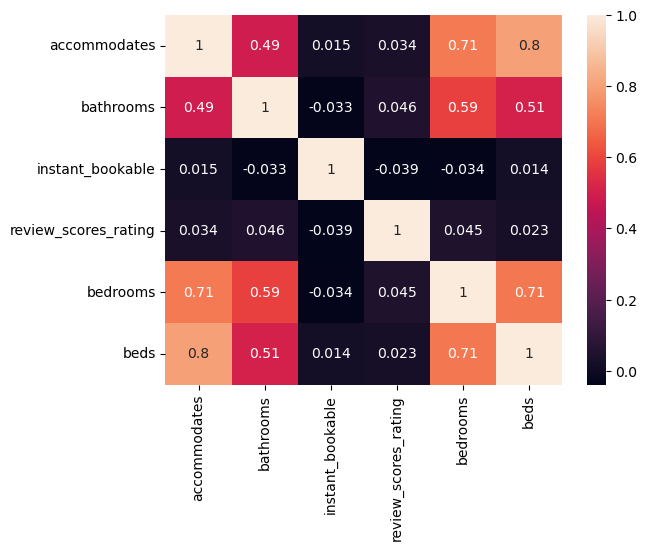

In [20]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

In [51]:
cor= df.corr()
cor

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
accommodates,1.000000,0.442579,0.019314,0.031041,0.694138,0.818271,0.583366,-0.487303,-0.141342,-0.056078,0.187288,0.205989
bathrooms,0.442579,1.000000,-0.030739,0.062422,0.552287,0.442142,0.342994,-0.112678,-0.014212,-0.063702,0.095992,0.065492
instant_bookable,0.019314,-0.030739,1.000000,-0.053285,-0.033925,0.012508,-0.068632,0.046699,0.006661,-0.021625,0.011192,0.010614
review_scores_rating,0.031041,0.062422,-0.053285,1.000000,0.050621,0.028059,0.126709,-0.053669,-0.026373,0.061970,-0.060844,0.010493
bedrooms,0.694138,0.552287,-0.033925,0.050621,1.000000,0.696606,0.482666,-0.248792,-0.073991,-0.058836,0.128211,0.120575
beds,0.818271,0.442142,0.012508,0.028059,0.696606,1.000000,0.477888,-0.397854,-0.062288,-0.057800,0.169712,0.168327
log_price,0.583366,0.342994,-0.068632,0.126709,0.482666,0.477888,1.000000,-0.503730,-0.249875,-0.064496,0.121215,0.106122
room_type_Private room,-0.487303,-0.112678,0.046699,-0.053669,-0.248792,-0.397854,-0.503730,1.000000,-0.134930,0.029346,-0.119489,-0.168835
room_type_Shared room,-0.141342,-0.014212,0.006661,-0.026373,-0.073991,-0.062288,-0.249875,-0.134930,1.000000,-0.029885,-0.025445,-0.088777
cancellation_policy_moderate,-0.056078,-0.063702,-0.021625,0.061970,-0.058836,-0.057800,-0.064496,0.029346,-0.029885,1.000000,-0.560500,0.056688


**Observation**

*Positive Correlation:*

- Accommodates and Bedrooms: These variables have a positive correlation of 0.694138, indicating that as the number of accommodates increases, the number of bedrooms tends to increase as well.
- Accommodates and Beds: These variables have a positive correlation of 0.818271, suggesting that properties with a higher accommodation capacity tend to have more beds available.
- Bedrooms and Beds: There is also a positive correlation of 0.696606 between these variables, indicating that properties with    more bedrooms generally have a higher number of beds.

*Negative Correlation:*

- Accommodates and Room Type (Private room, Shared room): Both room types have a negative correlation with the number of accommodates. This suggests that properties listed as private rooms or shared rooms tend to have a lower accommodation capacity.
- Log Price and Room Type (Private room, Shared room): There is a negative correlation between log price and the room types. This indicates that private rooms or shared rooms tend to have lower prices compared to other types of accommodations.

*Weak Correlation:*

- Instant Bookable and all other variables: The correlation coefficients between instant bookability and other variables (accommodates, bathrooms, review scores rating, etc.) are close to zero, indicating a weak or negligible correlation.

In [21]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54113 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   instant_bookable              54113 non-null  bool   
 3   review_scores_rating          54113 non-null  float64
 4   bedrooms                      54113 non-null  float64
 5   beds                          54113 non-null  float64
 6   log_price                     54113 non-null  float64
 7   room_type_Private room        54113 non-null  uint8  
 8   room_type_Shared room         54113 non-null  uint8  
 9   cancellation_policy_moderate  54113 non-null  uint8  
 10  cancellation_policy_strict    54113 non-null  uint8  
 11  cleaning_fee_True             54113 non-null  uint8  
dtypes: bool(1), float64(6), uint8(5)
memory usage: 3.2 MB


### Outlier Checks

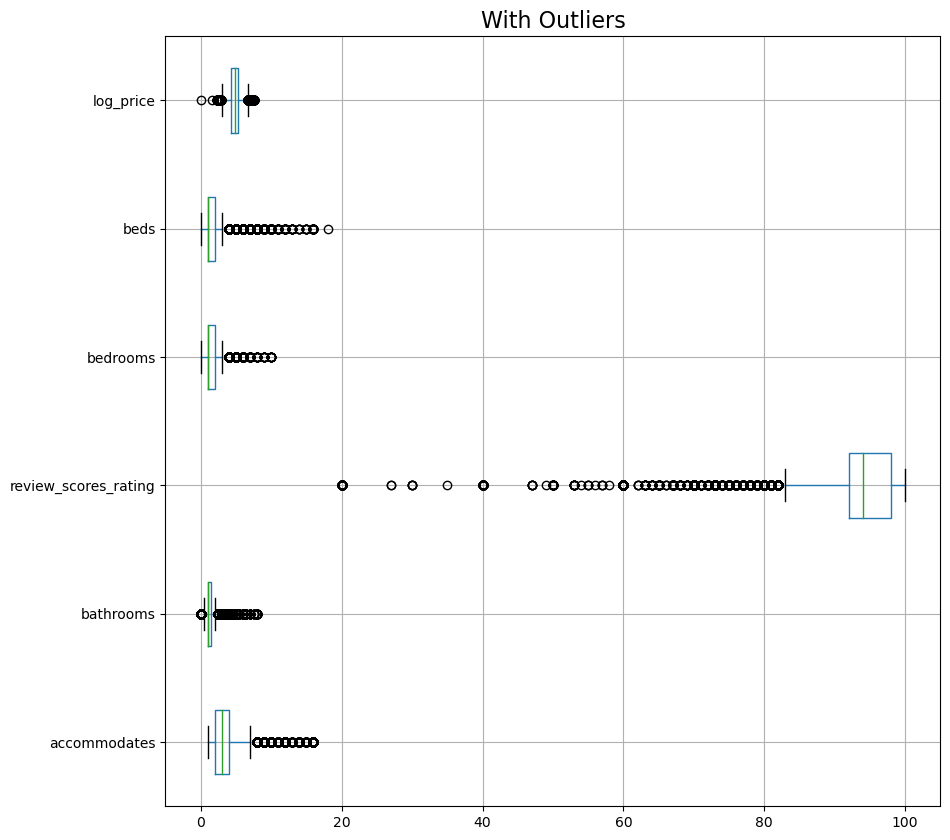

In [23]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

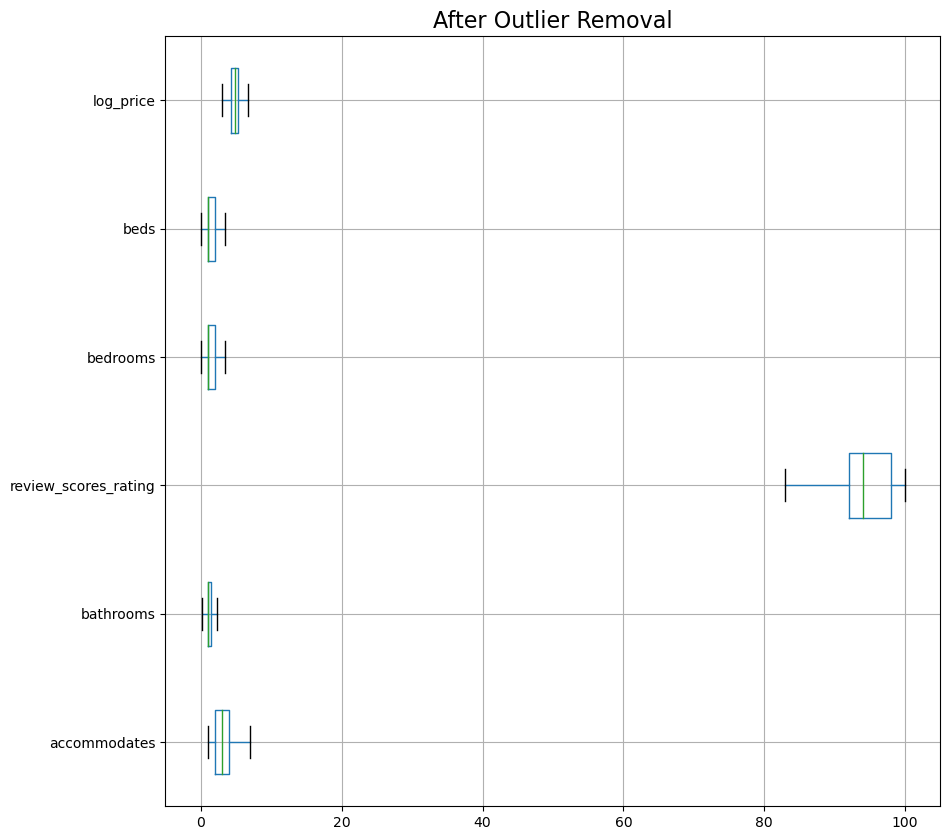

In [26]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

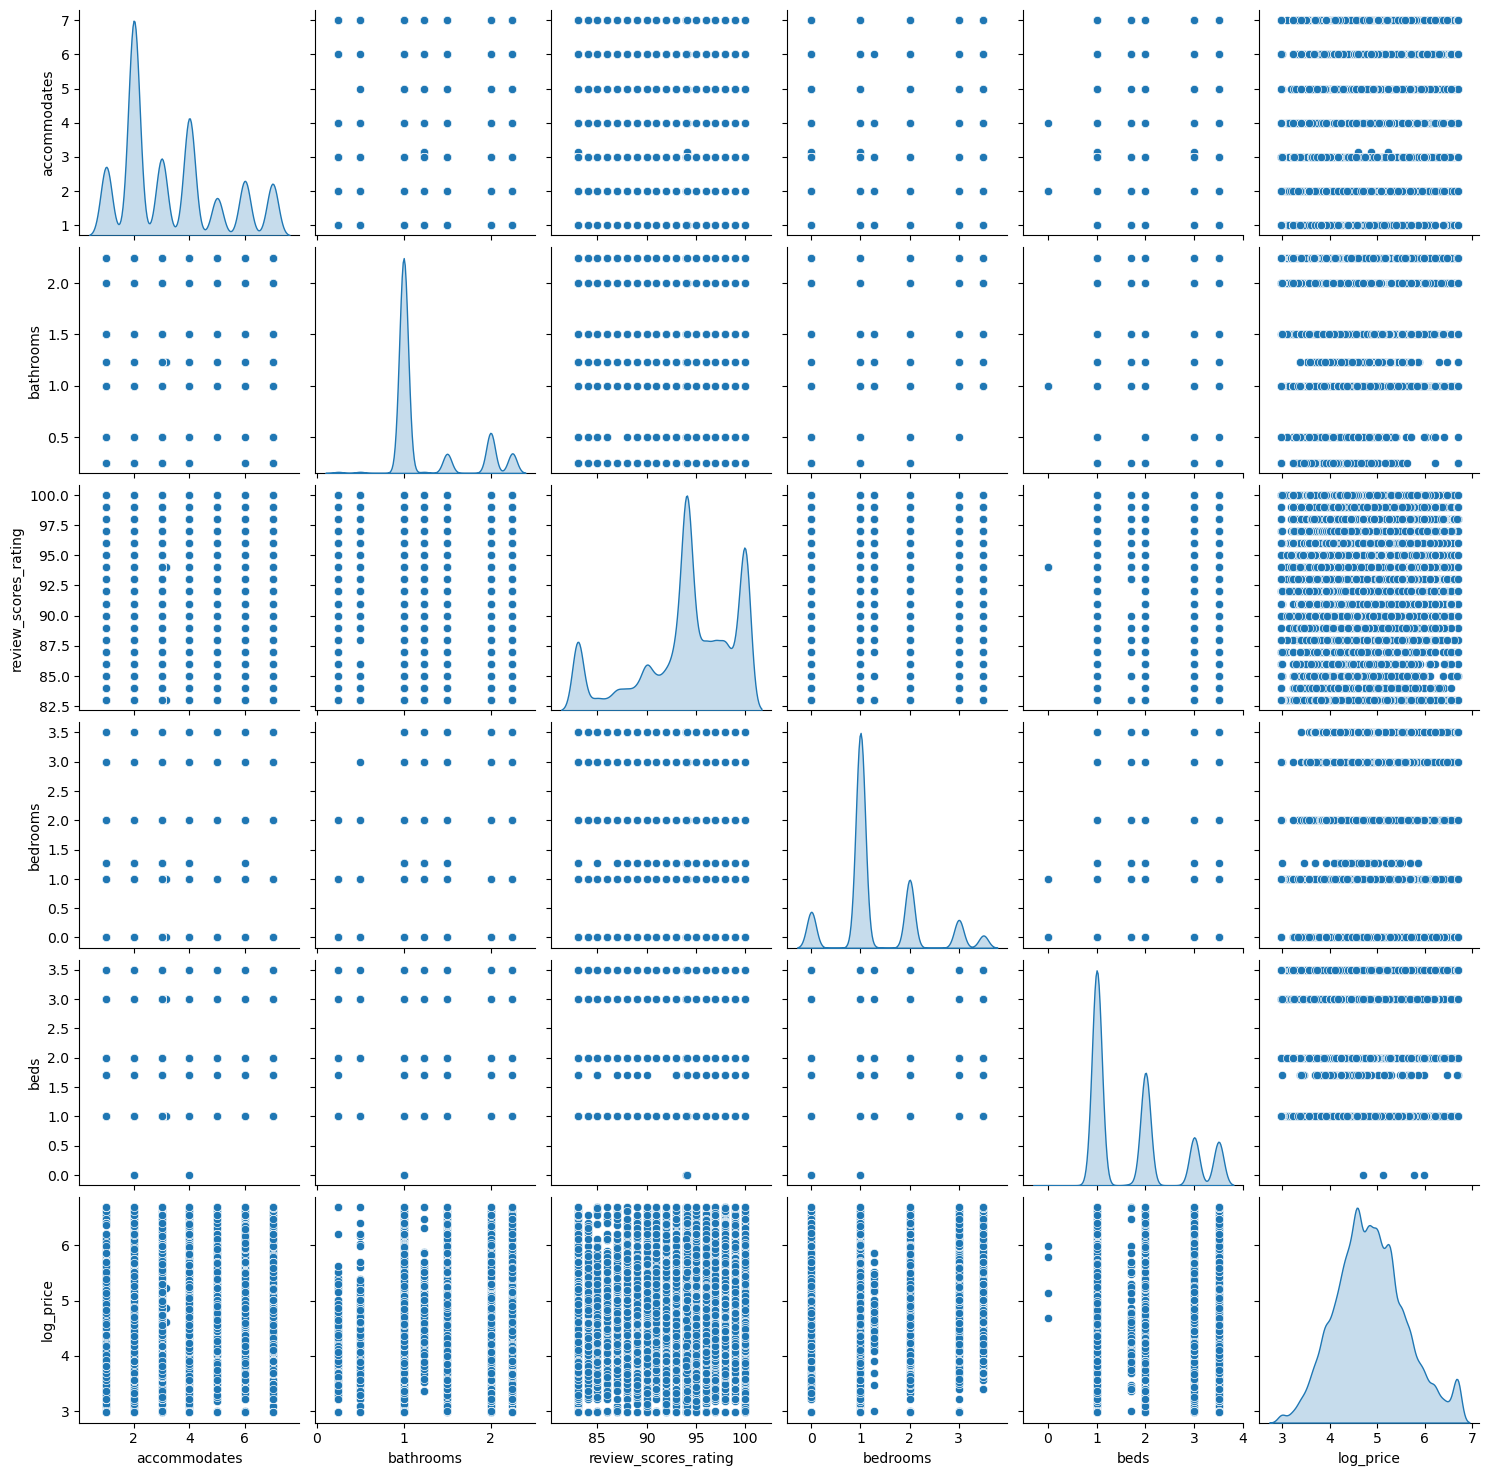

In [27]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

- The will code separate the predictor variables (stored in X) from the target variable (stored in y)
- This is a common step in machine learning tasks where we want to predict the target variable ('log_price') based on the predictor variables.

In [28]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [29]:
X.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1
4,2.0,1.0,True,83.000000,0.0,1.0,0,0,1,0,1


In [30]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [31]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.09505750537686584
The coefficient for bathrooms is 0.1808041686372081
The coefficient for instant_bookable is -0.06503896431474492
The coefficient for review_scores_rating is 0.011701869399644486
The coefficient for bedrooms is 0.1580588143641498
The coefficient for beds is -0.0450789948097015
The coefficient for room_type_Private room is -0.6115570888488939
The coefficient for room_type_Shared room is -1.0818048891941519
The coefficient for cancellation_policy_moderate is -0.06001522139640379
The coefficient for cancellation_policy_strict is -0.0058228706280895005
The coefficient for cleaning_fee_True is -0.08187381765072


*The coefficient represents the estimated change in the target variable (log_price) for a one-unit change in the corresponding independent variable while holding other variables constant.*

**OBSERVATIONS**

- *Accommodates:* For every one-unit increase in the "Accommodates" variable, the estimated change in log_price is 0.09505750537686584 units.

- *Bathrooms:* For every one-unit increase in the "Bathrooms" variable, the estimated change in log_price is 0.1808041686372081 units.

- *Instant Bookable:* For properties marked as "Instant Bookable," the estimated change in log_price is -0.06503896431474492 units compared to properties that are not instantly bookable.

- *Review Scores Rating:* For every one-unit increase in the "Review Scores Rating" variable, the estimated change in log_price is 0.011701869399644486 units.

- *Bedrooms:* For every one-unit increase in the "Bedrooms" variable, the estimated change in log_price is 0.1580588143641498 units.

- *Beds:* For every one-unit increase in the "Beds" variable, the estimated change in log_price is -0.0450789948097015 units.

- *Room Type (Private room, Shared room):* The "Room Type" variables represent dummy variables indicating whether the property is a private room or a shared room. The coefficients indicate that, compared to entire home/apartment listings, private rooms have an estimated decrease of -0.6115570888488939 units in log_price, while shared rooms have an estimated decrease of -1.0818048891941519 units.

- *Cancellation Policy (Moderate, Strict):* The coefficients for the cancellation policy variables suggest that having a "Moderate" or "Strict" cancellation policy is associated with estimated decreases of -0.06001522139640379 and -0.0058228706280895005 units in log_price, respectively, compared to having a "Flexible" cancellation policy.

- *Cleaning Fee:* For properties with a cleaning fee, the estimated change in log_price is -0.08187381765072 units compared to properties without a cleaning fee.

**SUMMARY**

*Positive coefficients indicate a positive relationship with log_price, while negative coefficients indicate a negative relationship. The coefficients can help understand the relative importance and influence of each attribute in predicting the strategic pricing of new Airbnb listings.*

In [33]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.4292638017758517


In [34]:
# R square on training data
regression_model.score(X_train, y_train)

0.5082917563299906

50% of the variation in the log_price is explained by the predictors in the model for train set

In [35]:
# R square on testing data
regression_model.score(X_test, y_test)

0.5019765734338826

In [36]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.5159255811569988

In [37]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.5197867614388492

### Linear Regression using statsmodels

In [38]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,log_price
50743,3.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1,5.010635
12586,5.0,2.0,False,92.000000,2.0,2.0,0,0,0,1,1,5.703782
4152,4.0,1.0,False,100.000000,2.0,2.0,0,0,0,1,0,5.857933
10059,2.0,1.5,True,94.067365,1.0,1.0,1,0,0,1,0,5.129899
38268,4.0,1.0,False,84.000000,1.0,2.0,0,0,0,1,1,4.564348


In [39]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [40]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_private_room', 'room_type_shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [41]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [42]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       3.429264
instant_bookable[T.True]       -0.065039
accommodates                    0.095058
bathrooms                       0.180804
review_scores_rating            0.011702
bedrooms                        0.158059
beds                           -0.045079
room_type_private_room         -0.611557
room_type_shared_room          -1.081805
cancellation_policy_moderate   -0.060015
cancellation_policy_strict     -0.005823
cleaning_fee_True              -0.081874
dtype: float64

**OBSERVATIONS**

- instant_bookable: This coefficient corresponds to the variable instant_bookable when its value is True (indicating the property is instantly bookable). The coefficient of -0.065039 suggests that, compared to properties that are not instantly bookable, properties marked as instantly bookable have an estimated decrease in log_price of 0.065039 units.

- *accommodates:* For every one-unit increase in the accommodates variable (the number of guests the property can accommodate), there is an estimated increase of 0.095058 units in the log_price.

- *bathrooms:* For every one-unit increase in the bathrooms variable (the number of bathrooms in the property), there is an estimated increase of 0.180804 units in the log_price.

- *review_scores_rating:* For every one-unit increase in the review_scores_rating variable (a measure of the property's review scores), there is an estimated increase of 0.011702 units in the log_price.

- *bedrooms:* For every one-unit increase in the bedrooms variable (the number of separate bedrooms in the property), there is an estimated increase of 0.158059 units in the log_price.

- *beds:* For every one-unit increase in the beds variable (the number of beds in the property), there is an estimated decrease of 0.045079 units in the log_price.

- *room_type_private_room:* This coefficient corresponds to the variable room_type_private_room, which represents whether the property is a private room. The coefficient of -0.611557 suggests that, compared to entire home/apartment listings, private rooms have an estimated decrease in log_price of 0.611557 units.

- *room_type_shared_room:* This coefficient corresponds to the variable room_type_shared_room, which represents whether the property is a shared room. The coefficient of -1.081805 suggests that, compared to entire home/apartment listings, shared rooms have an estimated decrease in log_price of 1.081805 units.

- *cancellation_policy_moderate:* This coefficient corresponds to the variable cancellation_policy_moderate, representing a moderate cancellation policy. The coefficient of -0.060015 suggests that, compared to properties with a flexible cancellation policy, properties with a moderate cancellation policy have an estimated decrease in log_price of 0.060015 units.

- *cancellation_policy_strict:* This coefficient corresponds to the variable cancellation_policy_strict, representing a strict cancellation policy. The coefficient of -0.005823 suggests that, compared to properties with a flexible cancellation policy, properties with a strict cancellation policy have an estimated decrease in log_price of 0.005823 units.

- *cleaning_fee_True:* This coefficient corresponds to the variable cleaning_fee_True, indicating whether a cleaning fee is charged for the property. The coefficient of -0.081874 suggests that, compared to properties without a cleaning fee, properties with a cleaning fee have an estimated decrease in log_price of 0.081874 units.

In [43]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        14:50:29   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

**OBSERVATIONS**

The R-squared value of 0.508 indicates that approximately 50.8% of the variability in log_price is accounted for by the independent variables in the model.

These p-values indicate the statistical significance of each coefficient. A p-value less than the chosen significance level (e.g., 0.05) suggests that the corresponding independent variable has a significant impact on log_price.

The number of accommodates, bathrooms, bedrooms, and review scores rating positively impact the log_price of the property. As these variables increase, the log_price is estimated to increase as well.

The number of beds and the presence of a cleaning fee have a negative effect on the log_price. As the number of beds increases or a cleaning fee is charged, the log_price is estimated to decrease.

The type of room also plays a significant role in determining the log_price. Private rooms and shared rooms have lower log_prices compared to entire home/apartment listings, as indicated by the negative coefficients.

The cancellation policy variable shows that having a moderate cancellation policy is associated with a decrease in log_price compared to a flexible cancellation policy, while the effect of having a strict cancellation policy is not statistically significant.

In [52]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

In [53]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.5159255811569989

In [46]:
np.sqrt(lm1.mse_resid) #another way

0.5160018732951103

In [47]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

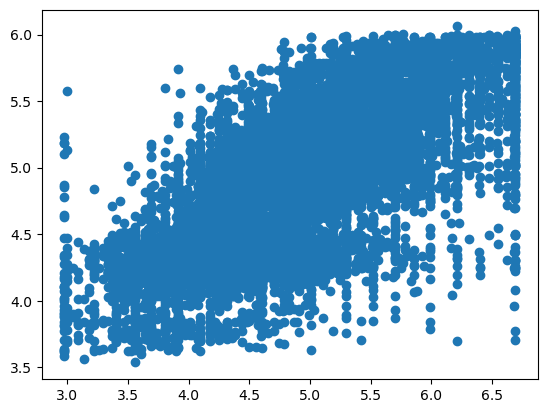

In [48]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [49]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True + 

 # Conclusion

The final Linear Regression equation is  
  
  
log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant. Similarly, 

The coefficient (-0.01) for cancellation_policy_strict represents the estimated change in log_price for a property with a strict cancellation policy compared to a flexible cancellation policy.

